📝 CATEGORICAL COLUMNS: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']

✅ 'Mjob' ENCODING MAPPING:
  at_home -> 0
  health -> 1
  other -> 2
  services -> 3
  teacher -> 4

📋 DATASET AFTER ENCODING (First 5 rows of categorical columns):
   school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
0       0    0        1        0        0     0     4       0         1   
1       0    0        1        0        1     0     2       0         0   
2       0    0        1        1        1     0     2       2         1   
3       0    0        1        0        1     1     3       1         1   
4       0    0        1        0        1     2     2       1         0   

   schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  \
0          1       0     0           0        1       1         0         0   
1          0

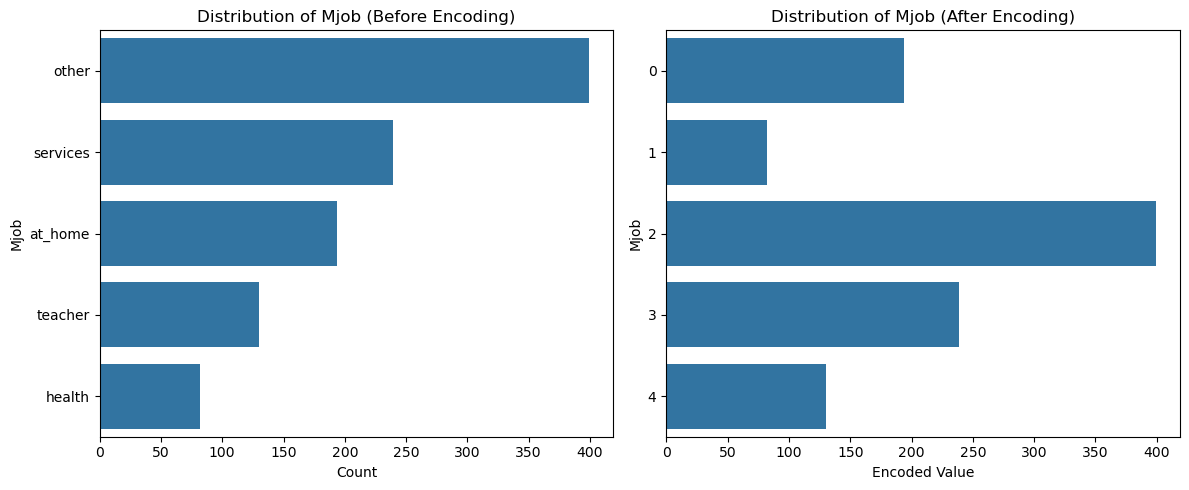

In [1]:
# Member 1:IT24103648 RANASINGHA R.A.D.S
# Preprocessing Technique: Encoding Categorical Variables
# Explanation: Encoding categorical variables converts non-numerical data (e.g., 'Mjob', 'sex') into numerical format using 
# techniques like Label Encoding, enabling their use in machine learning models. Label Encoding assigns a unique integer to each category.
# Justification: The dataset contains categorical columns (e.g., 'Mjob', 'Fjob', 'sex') with 18 object-type variables. Encoding is 
# necessary to include these features in numerical analyses or models that require quantitative inputs.

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Load and combine datasets (Update paths to match your environment)
df_math = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-mat.csv', sep=";")
df_por = pd.read_csv(r'C:\\Users\\User\\Desktop\\2025-Y2-S1-MLB-B13G1-10AIMLProject\\student-por.csv', sep=";")

df_math['subject'] = 'math'
df_por['subject'] = 'portuguese'

df = pd.concat([df_math, df_por], ignore_index=True)

# 1. Identify Categorical Columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("📝 CATEGORICAL COLUMNS:", list(categorical_columns))

# 2. EDA Visualization Before Encoding (Countplot for 'Mjob' as an example)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(y=df['Mjob'], order=df['Mjob'].value_counts().index)  # Mother's job distribution
plt.title('Distribution of Mjob (Before Encoding)')
plt.xlabel('Count')

# Interpretation: The countplot shows the frequency of each 'Mjob' category (e.g., 'other' is most common), highlighting the need for encoding.

# 3. Apply Encoding (Using Label Encoding)
label_encoders = {}
df_encoded = df.copy()

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoder for potential inverse transformation

# 4. Show Implementation Output (Encoding mapping and first 5 rows)
print("\n✅ 'Mjob' ENCODING MAPPING:")
for i, class_name in enumerate(label_encoders['Mjob'].classes_):
    print(f"  {class_name} -> {i}")

print("\n📋 DATASET AFTER ENCODING (First 5 rows of categorical columns):")
print(df_encoded[categorical_columns].head())

# 5. EDA Visualization After Encoding (Countplot of encoded 'Mjob')
plt.subplot(1, 2, 2)
sns.countplot(y=df_encoded['Mjob'])
plt.title('Distribution of Mjob (After Encoding)')
plt.xlabel('Encoded Value')

# Interpretation: The encoded 'Mjob' countplot retains the same distribution but uses integers (0-4), making it suitable for modeling.
plt.tight_layout()
plt.show()

# Save the visualization (optional, for results/eda_visualizations/ folder)
plt.savefig('encoding_categorical_variables.png')